<a href="https://colab.research.google.com/github/StoneAustin/Biomass-Scaling/blob/main/5_Generating_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install rasterio
!pip install geopandas
!pip install rasterstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import geopandas as gpd
import rasterio
from rasterstats import zonal_stats
import pandas as pd
import os

# Specify file paths
shapefile_path = "/content/drive/My Drive/Colab Notebooks/Thesis Files/Shapefiles/Williford_Boundary/Williford_Cotton_Rectangle_2018.shp"

ndvi_folder_path = '/content/drive/My Drive/Colab Notebooks/Thesis Files/Images/Clipped_Vegetation_Indices/Clipped_NDVI'
ndre_folder_path = '/content/drive/My Drive/Colab Notebooks/Thesis Files/Images/Clipped_Vegetation_Indices/Clipped_NDRE'
cgi_folder_path = '/content/drive/My Drive/Colab Notebooks/Thesis Files/Images/Clipped_Vegetation_Indices/Clipped_CGI'
savi_folder_path = '/content/drive/My Drive/Colab Notebooks/Thesis Files/Images/Clipped_Vegetation_Indices/Clipped_SAVI'
msavi_folder_path = '/content/drive/My Drive/Colab Notebooks/Thesis Files/Images/Clipped_Vegetation_Indices/Clipped_MSAVI'
ci_folder_path = '/content/drive/My Drive/Colab Notebooks/Thesis Files/Images/Clipped_Vegetation_Indices/Clipped_CI'
evi2_folder_path ='/content/drive/My Drive/Colab Notebooks/Thesis Files/Images/Clipped_Vegetation_Indices/Clipped_EVI2'
gli_folder_path = '/content/drive/My Drive/Colab Notebooks/Thesis Files/Images/Clipped_Vegetation_Indices/Clipped_GLI'
gndvi_folder_path = '/content/drive/My Drive/Colab Notebooks/Thesis Files/Images/Clipped_Vegetation_Indices/Clipped_GNDVI'
ndwi_folder_path = '/content/drive/My Drive/Colab Notebooks/Thesis Files/Images/Clipped_Vegetation_Indices/Clipped_NDWI'
vari_folder_path = '/content/drive/My Drive/Colab Notebooks/Thesis Files/Images/Clipped_Vegetation_Indices/Clipped_VARI'
osavi_folder_path = '/content/drive/My Drive/Colab Notebooks/Thesis Files/Images/Clipped_Vegetation_Indices/Clipped_OSAVI'

In [13]:
# Read in shapefile
gdf = gpd.read_file(shapefile_path)

# Print the number of features (i.e. rows) in the shapefile
print(f"Number of features: {len(gdf)}")

# Print the CRS (coordinate reference system) of the shapefile
print(f"CRS: {gdf.crs}")

# Print the column names of the attribute table
print("Column names:")
for col in gdf.columns:
    print(col)

Number of features: 6
CRS: epsg:26917
Column names:
SampleID
GarmID
Crop
Area
geometry


In [14]:
dates =['2018-06-18','2018-07-12','2018-07-24','2018-08-03','2018-08-31','2018-09-07','2018-09-21','2018-10-17']

**NDVI**

In [15]:
# Read in shapefile
gdf = gpd.read_file(shapefile_path)


# Loop through raster files
data = []
for filename in os.listdir(ndvi_folder_path):
    if filename.endswith(".tif"):
        # Read in raster file
        raster_path = os.path.join(ndvi_folder_path, filename)
        with rasterio.open(raster_path) as src:
            # Extract statistics for each polygon in the shapefile
            stats = zonal_stats(gdf, raster_path, stats="mean", nodata=-999)
            # Add statistics to the data list
            for i, s in enumerate(stats):
                data.append({
                    "SampleID": gdf.iloc[i]["SampleID"],
                    "filename": filename[:-4],
                    "mean_value": s["mean"]
                })

# Create a DataFrame from the data list
df = pd.DataFrame(data)

# Merge with the original GeoDataFrame based on the "SampleID" column
merged = pd.merge(gdf, df, on="SampleID")

# Save updated GeoDataFrame and DataFrame
merged.to_file("/content/drive/My Drive/Colab Notebooks/Thesis Files/Shapefiles/VI_AVG/NDVI_AVG_Will_2018.shp")
df.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/NDVI_AVG_Will_2018.csv", index=False)

In [16]:
import pandas as pd

# Read in CSV file
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/NDVI_AVG_Will_2018.csv")

# Pivot DataFrame by filename and SampleID
pivoted = df.pivot(index='SampleID', columns='filename', values='mean_value')

# Replace column names
pivoted.columns = dates

# Reset index to turn SampleID into a column
pivoted = pivoted.reset_index()

# Save pivoted DataFrame to CSV file
pivoted.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/NDVI_AVG_Will_2018.csv", index=False)


**NDRE**

In [17]:
# Read in shapefile
gdf = gpd.read_file(shapefile_path)


# Loop through raster files
data = []
for filename in os.listdir(ndre_folder_path):
    if filename.endswith(".tif"):
        # Read in raster file
        raster_path = os.path.join(ndre_folder_path, filename)
        with rasterio.open(raster_path) as src:
            # Extract statistics for each polygon in the shapefile
            stats = zonal_stats(gdf, raster_path, stats="mean", nodata=-999)
            # Add statistics to the data list
            for i, s in enumerate(stats):
                data.append({
                    "SampleID": gdf.iloc[i]["SampleID"],
                    "filename": filename[:-4],
                    "mean_value": s["mean"]
                })

# Create a DataFrame from the data list
df = pd.DataFrame(data)

# Merge with the original GeoDataFrame based on the "SampleID" column
merged = pd.merge(gdf, df, on="SampleID")

# Save updated GeoDataFrame and DataFrame
merged.to_file("/content/drive/My Drive/Colab Notebooks/Thesis Files/Shapefiles/VI_AVG/NDRE_AVG_Will_2018.shp")
df.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/NDRE_AVG_Will_2018.csv", index=False)

In [18]:
import pandas as pd

# Read in CSV file
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/NDRE_AVG_Will_2018.csv")


# Pivot DataFrame by filename and SampleID
pivoted = df.pivot(index='SampleID', columns='filename', values='mean_value')

# Replace column names
pivoted.columns = dates

# Reset index to turn SampleID into a column
pivoted = pivoted.reset_index()

# Save pivoted DataFrame to CSV file
pivoted.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/NDRE_AVG_Will_2018.csv", index=False)


**CGI**

In [19]:
# Read in shapefile
gdf = gpd.read_file(shapefile_path)


# Loop through raster files
data = []
for filename in os.listdir(cgi_folder_path):
    if filename.endswith(".tif"):
        # Read in raster file
        raster_path = os.path.join(cgi_folder_path, filename)
        with rasterio.open(raster_path) as src:
            # Extract statistics for each polygon in the shapefile
            stats = zonal_stats(gdf, raster_path, stats="mean", nodata=-999)
            # Add statistics to the data list
            for i, s in enumerate(stats):
                data.append({
                    "SampleID": gdf.iloc[i]["SampleID"],
                    "filename": filename[:-4],
                    "mean_value": s["mean"]
                })

# Create a DataFrame from the data list
df = pd.DataFrame(data)

# Merge with the original GeoDataFrame based on the "SampleID" column
merged = pd.merge(gdf, df, on="SampleID")

# Save updated GeoDataFrame and DataFrame
merged.to_file("/content/drive/My Drive/Colab Notebooks/Thesis Files/Shapefiles/VI_AVG/CGI_AVG_Will_2018.shp")
df.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/CGI_AVG_Will_2018.csv", index=False)

In [20]:
import pandas as pd

# Read in CSV file
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/CGI_AVG_Will_2018.csv")

# Pivot DataFrame by filename and SampleID
pivoted = df.pivot(index='SampleID', columns='filename', values='mean_value')

# Replace column names
pivoted.columns = dates

# Reset index to turn SampleID into a column
pivoted = pivoted.reset_index()

# Save pivoted DataFrame to CSV file
pivoted.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/CGI_AVG_Will_2018.csv", index=False)


**SAVI**

In [21]:
# Read in shapefile
gdf = gpd.read_file(shapefile_path)


# Loop through raster files
data = []
for filename in os.listdir(savi_folder_path):
    if filename.endswith(".tif"):
        # Read in raster file
        raster_path = os.path.join(savi_folder_path, filename)
        with rasterio.open(raster_path) as src:
            # Extract statistics for each polygon in the shapefile
            stats = zonal_stats(gdf, raster_path, stats="mean", nodata=-999)
            # Add statistics to the data list
            for i, s in enumerate(stats):
                data.append({
                    "SampleID": gdf.iloc[i]["SampleID"],
                    "filename": filename[:-4],
                    "mean_value": s["mean"]
                })

# Create a DataFrame from the data list
df = pd.DataFrame(data)

# Merge with the original GeoDataFrame based on the "SampleID" column
merged = pd.merge(gdf, df, on="SampleID")

# Save updated GeoDataFrame and DataFrame
merged.to_file("/content/drive/My Drive/Colab Notebooks/Thesis Files/Shapefiles/VI_AVG/SAVI_AVG_Will_2018.shp")
df.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/SAVI_AVG_Will_2018.csv", index=False)

In [22]:
import pandas as pd

# Read in CSV file
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/SAVI_AVG_Will_2018.csv")

# Pivot DataFrame by filename and SampleID
pivoted = df.pivot(index='SampleID', columns='filename', values='mean_value')

# Replace column names
pivoted.columns = dates

# Reset index to turn SampleID into a column
pivoted = pivoted.reset_index()

# Save pivoted DataFrame to CSV file
pivoted.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/SAVI_AVG_Will_2018.csv", index=False)


**MSAVI**

In [23]:
# Read in shapefile
gdf = gpd.read_file(shapefile_path)


# Loop through raster files
data = []
for filename in os.listdir(msavi_folder_path):
    if filename.endswith(".tif"):
        # Read in raster file
        raster_path = os.path.join(msavi_folder_path, filename)
        with rasterio.open(raster_path) as src:
            # Extract statistics for each polygon in the shapefile
            stats = zonal_stats(gdf, raster_path, stats="mean", nodata=-999)
            # Add statistics to the data list
            for i, s in enumerate(stats):
                data.append({
                    "SampleID": gdf.iloc[i]["SampleID"],
                    "filename": filename[:-4],
                    "mean_value": s["mean"]
                })

# Create a DataFrame from the data list
df = pd.DataFrame(data)

# Merge with the original GeoDataFrame based on the "SampleID" column
merged = pd.merge(gdf, df, on="SampleID")

# Save updated GeoDataFrame and DataFrame
merged.to_file("/content/drive/My Drive/Colab Notebooks/Thesis Files/Shapefiles/VI_AVG/MSAVI_AVG_Will_2018.shp")
df.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/MSAVI_AVG_Will_2018.csv", index=False)

In [24]:
import pandas as pd

# Read in CSV file
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/MSAVI_AVG_Will_2018.csv")

# Pivot DataFrame by filename and SampleID
pivoted = df.pivot(index='SampleID', columns='filename', values='mean_value')

# Replace column names
pivoted.columns = dates

# Reset index to turn SampleID into a column
pivoted = pivoted.reset_index()

# Save pivoted DataFrame to CSV file
pivoted.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/MSAVI_AVG_Will_2018.csv", index=False)


**CI**

In [25]:
# Read in shapefile
gdf = gpd.read_file(shapefile_path)


# Loop through raster files
data = []
for filename in os.listdir(ci_folder_path):
    if filename.endswith(".tif"):
        # Read in raster file
        raster_path = os.path.join(ci_folder_path, filename)
        with rasterio.open(raster_path) as src:
            # Extract statistics for each polygon in the shapefile
            stats = zonal_stats(gdf, raster_path, stats="mean", nodata=-999)
            # Add statistics to the data list
            for i, s in enumerate(stats):
                data.append({
                    "SampleID": gdf.iloc[i]["SampleID"],
                    "filename": filename[:-4],
                    "mean_value": s["mean"]
                })

# Create a DataFrame from the data list
df = pd.DataFrame(data)

# Merge with the original GeoDataFrame based on the "SampleID" column
merged = pd.merge(gdf, df, on="SampleID")

# Save updated GeoDataFrame and DataFrame
merged.to_file("/content/drive/My Drive/Colab Notebooks/Thesis Files/Shapefiles/VI_AVG/CI_AVG_Will_2018.shp")
df.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/CI_AVG_Will_2018.csv", index=False)

In [26]:
import pandas as pd

# Read in CSV file
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/CI_AVG_Will_2018.csv")

# Pivot DataFrame by filename and SampleID
pivoted = df.pivot(index='SampleID', columns='filename', values='mean_value')

# Replace column names
pivoted.columns = dates

# Reset index to turn SampleID into a column
pivoted = pivoted.reset_index()

# Save pivoted DataFrame to CSV file
pivoted.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/CI_AVG_Will_2018.csv", index=False)


**EVI2**

In [27]:
# Read in shapefile
gdf = gpd.read_file(shapefile_path)


# Loop through raster files
data = []
for filename in os.listdir(evi2_folder_path):
    if filename.endswith(".tif"):
        # Read in raster file
        raster_path = os.path.join(evi2_folder_path, filename)
        with rasterio.open(raster_path) as src:
            # Extract statistics for each polygon in the shapefile
            stats = zonal_stats(gdf, raster_path, stats="mean", nodata=-999)
            # Add statistics to the data list
            for i, s in enumerate(stats):
                data.append({
                    "SampleID": gdf.iloc[i]["SampleID"],
                    "filename": filename[:-4],
                    "mean_value": s["mean"]
                })

# Create a DataFrame from the data list
df = pd.DataFrame(data)

# Merge with the original GeoDataFrame based on the "SampleID" column
merged = pd.merge(gdf, df, on="SampleID")

# Save updated GeoDataFrame and DataFrame
merged.to_file("/content/drive/My Drive/Colab Notebooks/Thesis Files/Shapefiles/VI_AVG/EVI2_AVG_Will_2018.shp")
df.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/EVI2_AVG_Will_2018.csv", index=False)

In [28]:
import pandas as pd

# Read in CSV file
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/EVI2_AVG_Will_2018.csv")

# Pivot DataFrame by filename and SampleID
pivoted = df.pivot(index='SampleID', columns='filename', values='mean_value')

# Replace column names
pivoted.columns = dates

# Reset index to turn SampleID into a column
pivoted = pivoted.reset_index()

# Save pivoted DataFrame to CSV file
pivoted.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/EVI2_AVG_Will_2018.csv", index=False)


**GLI**

In [29]:
# Read in shapefile
gdf = gpd.read_file(shapefile_path)


# Loop through raster files
data = []
for filename in os.listdir(gli_folder_path):
    if filename.endswith(".tif"):
        # Read in raster file
        raster_path = os.path.join(gli_folder_path, filename)
        with rasterio.open(raster_path) as src:
            # Extract statistics for each polygon in the shapefile
            stats = zonal_stats(gdf, raster_path, stats="mean", nodata=-999)
            # Add statistics to the data list
            for i, s in enumerate(stats):
                data.append({
                    "SampleID": gdf.iloc[i]["SampleID"],
                    "filename": filename[:-4],
                    "mean_value": s["mean"]
                })

# Create a DataFrame from the data list
df = pd.DataFrame(data)

# Merge with the original GeoDataFrame based on the "SampleID" column
merged = pd.merge(gdf, df, on="SampleID")

# Save updated GeoDataFrame and DataFrame
merged.to_file("/content/drive/My Drive/Colab Notebooks/Thesis Files/Shapefiles/VI_AVG/GLI_AVG_Will_2018.shp")
df.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/GLI_AVG_Will_2018.csv", index=False)

In [30]:
import pandas as pd

# Read in CSV file
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/GLI_AVG_Will_2018.csv")

# Pivot DataFrame by filename and SampleID
pivoted = df.pivot(index='SampleID', columns='filename', values='mean_value')

# Replace column names
pivoted.columns = dates

# Reset index to turn SampleID into a column
pivoted = pivoted.reset_index()

# Save pivoted DataFrame to CSV file
pivoted.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/GLI_AVG_Will_2018.csv", index=False)


**GNDVI**

In [31]:
# Read in shapefile
gdf = gpd.read_file(shapefile_path)


# Loop through raster files
data = []
for filename in os.listdir(gndvi_folder_path):
    if filename.endswith(".tif"):
        # Read in raster file
        raster_path = os.path.join(gndvi_folder_path, filename)
        with rasterio.open(raster_path) as src:
            # Extract statistics for each polygon in the shapefile
            stats = zonal_stats(gdf, raster_path, stats="mean", nodata=-999)
            # Add statistics to the data list
            for i, s in enumerate(stats):
                data.append({
                    "SampleID": gdf.iloc[i]["SampleID"],
                    "filename": filename[:-4],
                    "mean_value": s["mean"]
                })

# Create a DataFrame from the data list
df = pd.DataFrame(data)

# Merge with the original GeoDataFrame based on the "SampleID" column
merged = pd.merge(gdf, df, on="SampleID")

# Save updated GeoDataFrame and DataFrame
merged.to_file("/content/drive/My Drive/Colab Notebooks/Thesis Files/Shapefiles/VI_AVG/GNDVI_AVG_Will_2018.shp")
df.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/GNDVI_AVG_Will_2018.csv", index=False)

In [32]:
import pandas as pd

# Read in CSV file
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/GNDVI_AVG_Will_2018.csv")

# Pivot DataFrame by filename and SampleID
pivoted = df.pivot(index='SampleID', columns='filename', values='mean_value')

# Replace column names
pivoted.columns = dates

# Reset index to turn SampleID into a column
pivoted = pivoted.reset_index()

# Save pivoted DataFrame to CSV file
pivoted.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/GNDVI_AVG_Will_2018.csv", index=False)


OSAVI

In [33]:
# Read in shapefile
gdf = gpd.read_file(shapefile_path)


# Loop through raster files
data = []
for filename in os.listdir(osavi_folder_path):
    if filename.endswith(".tif"):
        # Read in raster file
        raster_path = os.path.join(osavi_folder_path, filename)
        with rasterio.open(raster_path) as src:
            # Extract statistics for each polygon in the shapefile
            stats = zonal_stats(gdf, raster_path, stats="mean", nodata=-999)
            # Add statistics to the data list
            for i, s in enumerate(stats):
                data.append({
                    "SampleID": gdf.iloc[i]["SampleID"],
                    "filename": filename[:-4],
                    "mean_value": s["mean"]
                })

# Create a DataFrame from the data list
df = pd.DataFrame(data)

# Merge with the original GeoDataFrame based on the "SampleID" column
merged = pd.merge(gdf, df, on="SampleID")

# Save updated GeoDataFrame and DataFrame
merged.to_file("/content/drive/My Drive/Colab Notebooks/Thesis Files/Shapefiles/VI_AVG/OSAVI_AVG_Will_2018.shp")
df.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/OSAVI_AVG_Will_2018.csv", index=False)

In [34]:
import pandas as pd

# Read in CSV file
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/OSAVI_AVG_Will_2018.csv")

# Pivot DataFrame by filename and SampleID
pivoted = df.pivot(index='SampleID', columns='filename', values='mean_value')

# Replace column names
pivoted.columns = dates

# Reset index to turn SampleID into a column
pivoted = pivoted.reset_index()

# Save pivoted DataFrame to CSV file
pivoted.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/OSAVI_AVG_Will_2018.csv", index=False)


NDWI

In [35]:
# Read in shapefile
gdf = gpd.read_file(shapefile_path)


# Loop through raster files
data = []
for filename in os.listdir(ndwi_folder_path):
    if filename.endswith(".tif"):
        # Read in raster file
        raster_path = os.path.join(ndwi_folder_path, filename)
        with rasterio.open(raster_path) as src:
            # Extract statistics for each polygon in the shapefile
            stats = zonal_stats(gdf, raster_path, stats="mean", nodata=-999)
            # Add statistics to the data list
            for i, s in enumerate(stats):
                data.append({
                    "SampleID": gdf.iloc[i]["SampleID"],
                    "filename": filename[:-4],
                    "mean_value": s["mean"]
                })

# Create a DataFrame from the data list
df = pd.DataFrame(data)

# Merge with the original GeoDataFrame based on the "SampleID" column
merged = pd.merge(gdf, df, on="SampleID")

# Save updated GeoDataFrame and DataFrame
merged.to_file("/content/drive/My Drive/Colab Notebooks/Thesis Files/Shapefiles/VI_AVG/NDWI_AVG_Will_2018.shp")
df.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/NDWI_AVG_Will_2018.csv", index=False)

In [36]:
import pandas as pd

# Read in CSV file
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/NDWI_AVG_Will_2018.csv")

# Pivot DataFrame by filename and SampleID
pivoted = df.pivot(index='SampleID', columns='filename', values='mean_value')

# Replace column names
pivoted.columns = dates

# Reset index to turn SampleID into a column
pivoted = pivoted.reset_index()

# Save pivoted DataFrame to CSV file
pivoted.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/NDWI_AVG_Will_2018.csv", index=False)

VARI

In [37]:
# Read in shapefile
gdf = gpd.read_file(shapefile_path)


# Loop through raster files
data = []
for filename in os.listdir(vari_folder_path):
    if filename.endswith(".tif"):
        # Read in raster file
        raster_path = os.path.join(vari_folder_path, filename)
        with rasterio.open(raster_path) as src:
            # Extract statistics for each polygon in the shapefile
            stats = zonal_stats(gdf, raster_path, stats="mean", nodata=-999)
            # Add statistics to the data list
            for i, s in enumerate(stats):
                data.append({
                    "SampleID": gdf.iloc[i]["SampleID"],
                    "filename": filename[:-4],
                    "mean_value": s["mean"]
                })

# Create a DataFrame from the data list
df = pd.DataFrame(data)

# Merge with the original GeoDataFrame based on the "SampleID" column
merged = pd.merge(gdf, df, on="SampleID")

# Save updated GeoDataFrame and DataFrame
merged.to_file("/content/drive/My Drive/Colab Notebooks/Thesis Files/Shapefiles/VI_AVG/VARI_AVG_Will_2018.shp")
df.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/VARI_AVG_Will_2018.csv", index=False)

In [38]:
import pandas as pd

# Read in CSV file
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/VARI_AVG_Will_2018.csv")

# Pivot DataFrame by filename and SampleID
pivoted = df.pivot(index='SampleID', columns='filename', values='mean_value')

# Replace column names
pivoted.columns = dates

# Reset index to turn SampleID into a column
pivoted = pivoted.reset_index()

# Save pivoted DataFrame to CSV file
pivoted.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/VARI_AVG_Will_2018.csv", index=False)

<ipython-input-39-bec3227383fb>:9: UserWarning: 
The markers list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df.T, dashes =False,markers='o')


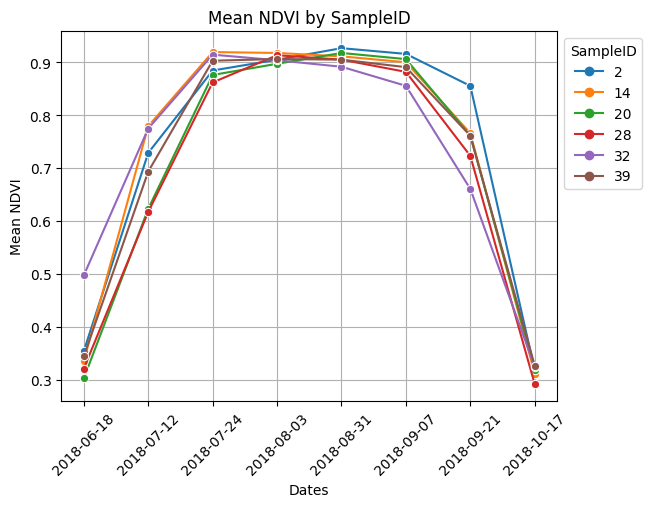

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in CSV file
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/NDVI_AVG_Will_2018.csv", index_col=0)

# Transpose DataFrame and plot using Seaborn
sns.lineplot(data=df.T, dashes =False,markers='o')

# Set axis labels and title
plt.xlabel("Dates")
plt.ylabel("Mean NDVI")
plt.title("Mean NDVI by SampleID")

# Add grid
plt.grid(True)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show legend and plot
plt.legend(title="SampleID", bbox_to_anchor=(1, 1))
plt.show()



In [40]:
path = ("/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables/")

for i, file_name in enumerate(os.listdir(path)):
    if file_name.endswith('.csv'):
      print(file_name)

NDVI_AVG_Will_2018.csv
NDRE_AVG_Will_2018.csv
CGI_AVG_Will_2018.csv
SAVI_AVG_Will_2018.csv
MSAVI_AVG_Will_2018.csv
CI_AVG_Will_2018.csv
EVI2_AVG_Will_2018.csv
GLI_AVG_Will_2018.csv
GNDVI_AVG_Will_2018.csv
OSAVI_AVG_Will_2018.csv
NDWI_AVG_Will_2018.csv
VARI_AVG_Will_2018.csv


<ipython-input-41-1896e71d62be>:25: UserWarning: 
The markers list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  lineplot = sns.lineplot(data=df.T, dashes=False, markers='o', legend=False, lw=.7,ax=axs[i//4, i%4])
<ipython-input-41-1896e71d62be>:25: UserWarning: 
The markers list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  lineplot = sns.lineplot(data=df.T, dashes=False, markers='o', legend=False, lw=.7,ax=axs[i//4, i%4])
<ipython-input-41-1896e71d62be>:25: UserWarning: 
The markers list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  lineplot = sns.lineplot(data=df.T, dashes=False, markers='o', legend=False, lw=.7,ax=axs[i//4, i%4])
<ipython-input-41-1896e71d62be>:25: UserWarning: 
The markers list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  lineplot = sns.lineplot(data=df.T, da

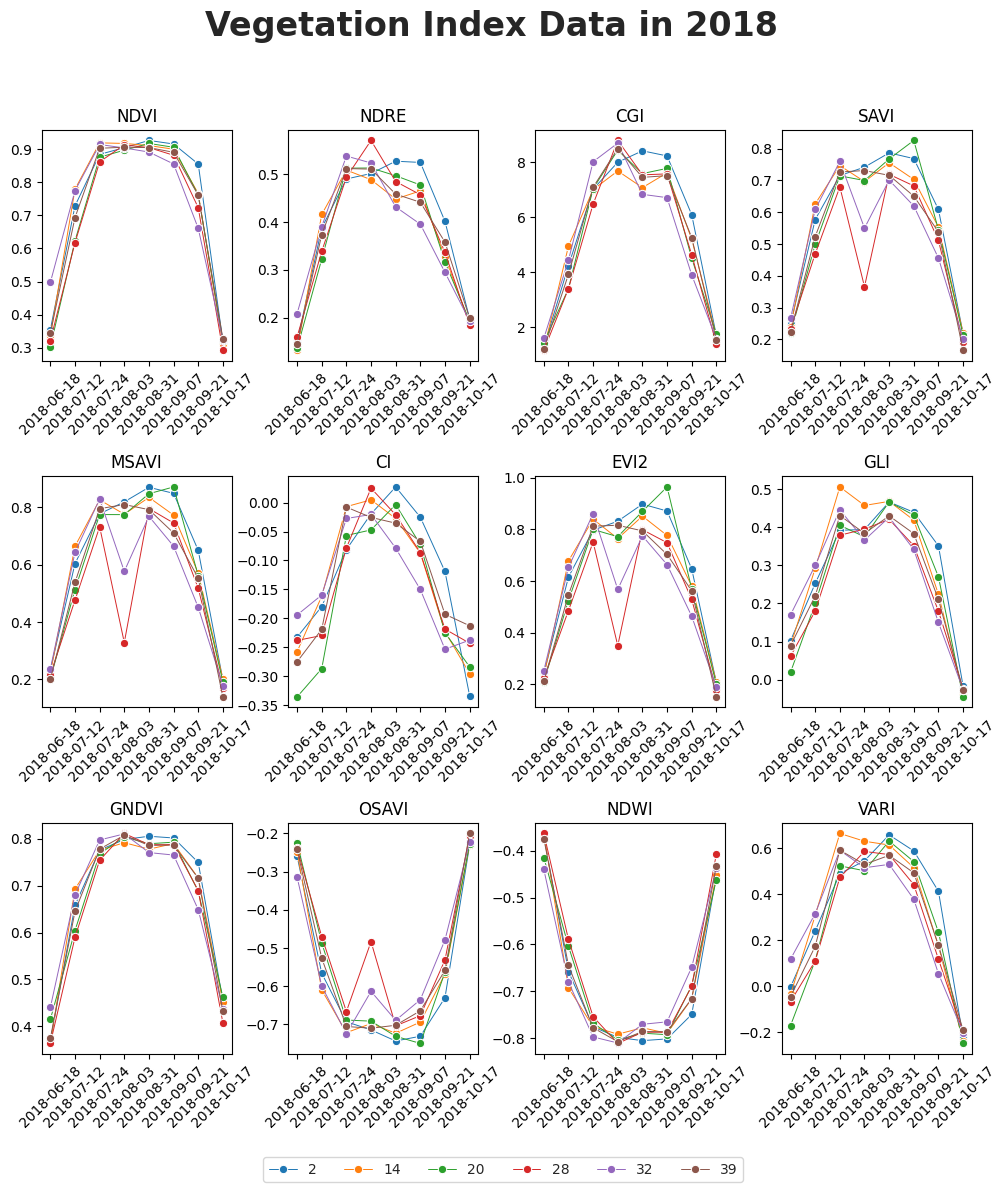

In [41]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# set the path to the directory containing the CSV files
path = '/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables'

# create a figure object with subplots for each CSV file
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12, 12))

# create variables to store legend handles and labels
legend_labels = ['2', '14','20','28','32','39']
legend_handles = []

sns.set_style("whitegrid")

# iterate over all the CSV files in the directory and plot each one in a separate subplot
for i, file_name in enumerate(os.listdir(path)):
    if file_name.endswith('.csv'):
        sns.set_style("whitegrid")
        # read the CSV file into a Pandas dataframe
        df = pd.read_csv(os.path.join(path, file_name), index_col=0)
        # use Seaborn's lineplot function to plot the dataframe in a separate subplot
        lineplot = sns.lineplot(data=df.T, dashes=False, markers='o', legend=False, lw=.7,ax=axs[i//4, i%4])
        # add the line handles to the legend_handles list
        legend_handles += lineplot.lines
        # set the title for the subplot
        axs[i//4, i%4].set_title(file_name.split("_")[0])
        # rotate the x-axis labels by 45 degrees
        axs[i//4, i%4].tick_params(axis='x', rotation=45)

# set the title for the figure
fig.suptitle('Vegetation Index Data in 2018',fontsize=24,fontweight='bold')

# adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# add a single legend at the bottom of the figure
fig.legend(handles=legend_handles, labels=legend_labels, loc='lower center', ncol=len(legend_labels))


# show the plot
plt.show()
